<h2> <b> Part 1- Creating the Database </b> </h2>

In [2]:
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import MetaData
from sqlalchemy.types import Integer, Text, String, DateTime

import numpy as np
from math import sqrt as sr

<b> In this part, a python class inheritance is used for creating tables in the sqlite database file </b>

In [3]:
class CreateTable:
    def __init__(self,name,dic,df,engine):
        self.name=name
        self.dic=dic
        self.df=df
        self.engine=engine
        
    def sqltable(self):
        self.df.to_sql(
            self.name,
            self.engine,
            if_exists='replace',
            index=False,
            chunksize=500,
            dtype=self.dic    
        )

In [4]:
### For table 01

table_name1='Table 01'
engine=create_engine('sqlite:///database_file.sqlite',echo=True)
dic1={
        "X":Integer,
        "Y1":Integer,
        "Y2":Integer,
        "Y3":Integer,
        "Y4":Integer
        }
df_train=pd.read_csv('train.csv')

In [5]:
type(df_train)

pandas.core.frame.DataFrame

In [6]:
### Calling the object
Table1=CreateTable(table_name1,dic1,df_train,engine)
Table1.sqltable()

2020-09-07 13:09:55,189 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-09-07 13:09:55,194 INFO sqlalchemy.engine.base.Engine ()
2020-09-07 13:09:55,195 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-09-07 13:09:55,196 INFO sqlalchemy.engine.base.Engine ()
2020-09-07 13:09:55,199 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("Table 01")
2020-09-07 13:09:55,200 INFO sqlalchemy.engine.base.Engine ()
2020-09-07 13:09:55,204 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("Table 01")
2020-09-07 13:09:55,205 INFO sqlalchemy.engine.base.Engine ()
2020-09-07 13:09:55,208 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2020-09-07 13:09:55,209 INFO sqlalchemy.engine.base.Engine ()
2020-09-07 13:09:55,212 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("Table 01")
2020-09-07 13:09:55,213 INFO sqlalchemy.engine.

In [7]:
### For table 02
table_name2='Table 02'
engine=create_engine('sqlite:///database_file.sqlite',echo=True)
dic2={
        "X":Integer,
        "X":Integer,
        "Y1":Integer, "Y2":Integer, "Y3":Integer, "Y4":Integer, "Y5":Integer, "Y6":Integer, "Y7":Integer, "Y8":Integer, "Y9":Integer, "Y10":Integer,
        "Y11":Integer, "Y12":Integer, "Y13":Integer, "Y14":Integer, "Y15":Integer, "Y16":Integer, "Y17":Integer, "Y18":Integer, "Y19":Integer, "Y20":Integer,
        "Y21":Integer, "Y22":Integer, "Y23":Integer, "Y24":Integer, "Y25":Integer, "Y26":Integer, "Y27":Integer, "Y28":Integer, "Y29":Integer, "Y30":Integer,
        "Y31":Integer, "Y32":Integer, "Y33":Integer, "Y34":Integer, "Y35":Integer, "Y36":Integer, "Y37":Integer, "Y38":Integer, "Y39":Integer, "Y40":Integer,
        "Y41":Integer, "Y42":Integer, "Y43":Integer, "Y44":Integer, "Y45":Integer, "Y46":Integer, "Y47":Integer, "Y48":Integer, "Y49":Integer, "Y50":Integer

        }
df_ideal=pd.read_csv('ideal.csv')

In [8]:
### Calling the object
Table_Ideal=CreateTable(table_name2,dic2,df_ideal,engine)
Table_Ideal.sqltable()

2020-09-07 13:09:56,122 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-09-07 13:09:56,123 INFO sqlalchemy.engine.base.Engine ()
2020-09-07 13:09:56,124 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-09-07 13:09:56,125 INFO sqlalchemy.engine.base.Engine ()
2020-09-07 13:09:56,127 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("Table 02")
2020-09-07 13:09:56,128 INFO sqlalchemy.engine.base.Engine ()
2020-09-07 13:09:56,134 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("Table 02")
2020-09-07 13:09:56,136 INFO sqlalchemy.engine.base.Engine ()
2020-09-07 13:09:56,139 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2020-09-07 13:09:56,141 INFO sqlalchemy.engine.base.Engine ()
2020-09-07 13:09:56,144 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("Table 02")
2020-09-07 13:09:56,146 INFO sqlalchemy.engine.

<b> The 2 tables can be seen in the  sqlite database, 'database_file.sqlite' </b>

<h2> <b> Part 2 - Regression  </b>  </h2>

Here, there are 50 ideal functions given with their values for 400 different input X values. <br>
There are also 4 testing data sets with the same 400 input X values <br>
The task is to identify the most fit 4 functions for the 4 training functions out of that 50 functions <br>
The method is least square error method.

In [9]:
# First we load the files that we used for the databse to pandas dataframes

df_test=pd.read_csv('test.csv')
df_ideal=pd.read_csv('ideal.csv')
df_train=pd.read_csv('train.csv')

<b>For Part I, the testind data schould be used to find the 4 most suitable functions </b>

In [10]:
Dic_train=df_train.to_numpy()
Dic_ideal=df_ideal.to_numpy()

In [11]:
#Table 1- Also added to the database in part 1
df_train.head(10)

,x,y1,y2,y3,y4
0,-20.0,20.335772,12.592549,-40.457386,0.554206
1,-19.9,19.911407,12.874750,-40.592697,0.132782
2,-19.8,20.299100,13.078601,-39.871925,0.607059
3,-19.7,19.520018,13.248604,-39.490990,0.357283
4,-19.6,19.302052,12.516659,-39.630980,0.873556
5,-19.5,19.524689,12.575787,-39.496460,0.437845
6,-19.4,19.069155,13.265868,-39.197630,0.722974
7,-19.3,19.452087,13.210606,-39.229730,0.742449
8,-19.2,18.857280,12.486542,-38.532257,1.262554
9,-19.1,19.212317,13.242693,-38.449170,1.049771


In [12]:
##### The Ideal functions can be visualized using,
df_ideal.head(10)

,x,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y41,y42,y43,y44,y45,y46,y47,y48,y49,y50
0,-20.0,-0.912945,0.408082,9.087055,5.408082,-9.087055,0.912945,-0.839071,-0.850919,0.816164,...,-40.456474,40.204040,2.995732,-0.008333,12.995732,5.298317,-5.298317,-0.186278,0.912945,0.396850
1,-19.9,-0.867644,0.497186,9.132356,5.497186,-9.132356,0.867644,-0.865213,0.168518,0.994372,...,-40.233820,40.048590,2.990720,-0.008340,12.990720,5.293305,-5.293305,-0.215690,0.867644,0.476954
2,-19.8,-0.813674,0.581322,9.186326,5.581322,-9.186326,0.813674,-0.889191,0.612391,1.162644,...,-40.006836,39.890660,2.985682,-0.008347,12.985682,5.288267,-5.288267,-0.236503,0.813674,0.549129
3,-19.7,-0.751573,0.659649,9.248426,5.659649,-9.248426,0.751573,-0.910947,-0.994669,1.319299,...,-39.775787,39.729824,2.980619,-0.008354,12.980619,5.283204,-5.283204,-0.247887,0.751573,0.612840
4,-19.6,-0.681964,0.731386,9.318036,5.731386,-9.318036,0.681964,-0.930426,0.774356,1.462772,...,-39.540980,39.565693,2.975530,-0.008361,12.975530,5.278115,-5.278115,-0.249389,0.681964,0.667902
5,-19.5,-0.605540,0.795815,9.394460,5.795815,-9.394460,0.605540,-0.947580,-0.117020,1.591630,...,-39.302770,39.397907,2.970414,-0.008368,12.970414,5.273000,-5.273000,-0.240949,0.605540,0.714434
6,-19.4,-0.523066,0.852292,9.476934,5.852292,-9.476934,0.523066,-0.962365,-0.590048,1.704585,...,-39.061530,39.226147,2.965273,-0.008375,12.965273,5.267858,-5.267858,-0.222902,0.523066,0.752791
7,-19.3,-0.435365,0.900254,9.564634,5.900254,-9.564634,0.435365,-0.974745,0.977765,1.800508,...,-38.817684,39.050125,2.960105,-0.008382,12.960105,5.262690,-5.262690,-0.195970,0.435365,0.783485
8,-19.2,-0.343315,0.939220,9.656685,5.939220,-9.656685,0.343315,-0.984688,-0.878952,1.878441,...,-38.571660,38.869610,2.954910,-0.008389,12.954910,5.257495,-5.257495,-0.161224,0.343315,0.807098
9,-19.1,-0.247834,0.968802,9.752166,5.968802,-9.752166,0.247834,-0.992170,0.375793,1.937605,...,-38.323917,38.684402,2.949688,-0.008396,12.949688,5.252274,-5.252274,-0.120051,0.247834,0.824208


In [50]:
len(Dic_ideal[0])

51

In [13]:
#This script is to find the functions with the least square method.

min_position=[] # This array records the positions of the minimum values of the 51-colum table
min_value=[] # This array records the corresponding minimum values
    
for q in range(len(Dic_train[0])-1):
    square_array2=[]
    for p in range(len(Dic_ideal[0])-1):
        tot=0
        for x in range(len(Dic_train[:,0])):
            dev_y=(Dic_ideal[:,p+1][x]-Dic_train[:,q+1][x])**2
            tot=tot+dev_y
        square_mean=sr(tot)/len(Dic_train[:,0])
        #print('Square mean is ', square_mean)
        square_array2.append(square_mean)
    min_value.append(min(square_array2))
    min_position.append(np.argmin(square_array2)+1) #Here, +1 to add X coloum

print('minimun positions are ', min_position)
print('minimun values are ', min_value)


minimun positions are  [33, 45, 41, 2]
minimun values are  [0.014652182117295395, 0.014404214576297411, 0.01411002784815242, 0.014059321476583278]


<h4> This is the algorythm for calculating the most suitable fuction </h4>

This is a unit test for the 4th training function <br>
(1) First, function is taken as a colunm vector <br>
(2) Then, consider one ideal function out of 50 <br>
(3) Then, respictive deviations are caluclated and least square regression is calculated iteratively <br>
(4) Then, again the least square regression for the 50 functions are calculated iteratively <br>
(5) Function which gives the minimum least square values is choosen as the most suitable one.


Text(0, 0.5, 'Least-square value')

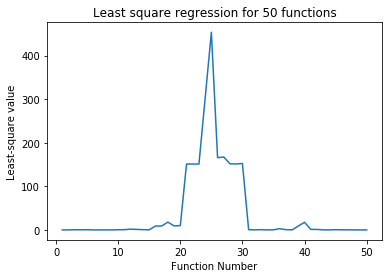

In [14]:
##### Let's Create a sample graph to show the minimum for the FUnction 4
from matplotlib import pyplot as plt
X_axis=range(1,51)
plt.plot(X_axis, square_array2)
plt.title('Least square regression for 50 functions')
plt.xlabel('Function Number')
plt.ylabel('Least-square value')

Although, it can not be visually identified the minimum value, we can get an idea about how 4th functions behave compared to the other 50. <br>
Functions which gives results closer to 0 are the most suitable ones. <br>
Out of that, the algorythm gives the function 2 as the most suitable.  

Considering the above results, following are the most suitable algorythm. <br>
For Function 1, it's Functions 33. <br>
For Function 2, it's Functions 45. <br>
For Function 3, it's Functions 41. <br>
For Function 4, it's Functions 2.

In [51]:
#Functions in an array
FUN1=Dic_ideal[:,33]
FUN2=Dic_ideal[:,45]
FUN3=Dic_ideal[:,41]
FUN4=Dic_ideal[:,2]
# We will create an combined array for the table
combined_array=np.transpose(np.array([Dic_train[:,0],FUN1,FUN2,FUN3,FUN4]))

In [54]:
Tabledf=pd.DataFrame({'X':combined_array[:,0],'Y1(Function 33)':combined_array[:,1],'Y2(Function 45)':combined_array[:,2], 'Y3(Function 41)':combined_array[:,3], 'Y4(Function 2)':combined_array[:,4]})

In [55]:
##### The choosed functions can be visualized using,
Tabledf.head(10)

,X,Y1(Function 33),Y2(Function 45),Y3(Function 41),Y4(Function 2)
0,-20.0,20.124610,12.995732,-40.456474,0.408082
1,-19.9,20.025234,12.990720,-40.233820,0.497186
2,-19.8,19.925863,12.985682,-40.006836,0.581322
3,-19.7,19.826498,12.980619,-39.775787,0.659649
4,-19.6,19.727139,12.975530,-39.540980,0.731386
5,-19.5,19.627787,12.970414,-39.302770,0.795815
6,-19.4,19.528440,12.965273,-39.061530,0.852292
7,-19.3,19.429102,12.960105,-38.817684,0.900254
8,-19.2,19.329770,12.954910,-38.571660,0.939220
9,-19.1,19.230444,12.949688,-38.323917,0.968802


In [47]:
#Let's define deviation arrays
Array_dev1=[]     #This gives the deviation of Training Y1 with Ideal Y34
Array_dev2=[]     #This gives the deviation of Training Y2 with Ideal Y46
Array_dev3=[]     #This gives the deviation of Training Y3 with Ideal Y42
Array_dev4=[]     #This gives the deviation of Training Y4 with Ideal Y3

for x in range(len(Dic_train[:,1])):
    Array_dev1.append(abs(Dic_ideal[:,33][x]-Dic_train[:,1][x]))
    Array_dev2.append(abs(Dic_ideal[:,45][x]-Dic_train[:,2][x]))
    Array_dev3.append(abs(Dic_ideal[:,41][x]-Dic_train[:,3][x]))
    Array_dev4.append(abs(Dic_ideal[:,2][x]-Dic_train[:,4][x]))
    

<h2> <b>Part 3 - Testing Set </b> </h2>

In [56]:
df3=pd.read_csv('test.csv')
Dic_test=df_test.to_numpy()

In [57]:
TrainX=Dic_train[:,0]
TestX= Dic_test[:,0]
TestY= Dic_test[:,1]

<b> We need to find the places where the 400-input has the same x values as the TestX Array </b>

In [58]:
POS_Array=[]  # This array gives the positions of x inputs same as the TestX
for POS in range(len(TestX)):
    TEMP=np.where(TrainX==TestX[POS])[0][0]
    POS_Array.append(TEMP)

In [59]:
### This is to find the function out of 4 with minimum devation 
Position=[]
for r in range(len(TestY)):
    Deviation=[]
    for i in range(4):
        Deviation.append(abs(combined_array[:,i+1][POS_Array[0]]-TestY[r]))
    x=np.argmin(Deviation)
    Position.append(x)
    
### Now we know the function with minimum deviation.

### Now we have to check if those can be mapped

Following are what the results mean <br>
0-Minimum at function 1  <br>
1-Minimum at function 2  <br>
2-Minimum at function 3  <br>
3-Minimum at function 4  <br>

<h3> <b> Mapping </b> </h3>

Now, we have found the minimum deviation which give the best possible fit for the teating set of 100 <br>
Now we have to check if those minimum cases can be mapped

In [60]:
###########################
## Largest deviations limits

LD1=np.max(Array_dev1)
LD2=np.max(Array_dev2)
LD3=np.max(Array_dev3)
LD4=np.max(Array_dev4)
print('Largest deviation in function 1 ', LD1)
print('Largest deviation in function 2 ', LD2)
print('Largest deviation in function 3 ', LD3)
print('Largest deviation in function 4 ', LD4)

Largest deviation in function 1  0.4999793000000001
Largest deviation in function 2  0.49920799999999943
Largest deviation in function 3  0.4992830000000019
Largest deviation in function 4  0.4985096200000001


In [61]:
match_col=[]  # This gives where to map out of 4 functions in the final table 
Deviation_array=[] # This gives the deviation for the final table


############### Steps ###############################
#### (1) Mapping available only if sqrt(2)* maximum deviation of previous > now deviation
#### (2) We know the postion of 4 ideal functions where the testing set X values should be applied
#        and Y should be compared
#### (3) If the mapping possible, match_col array is append
#### (4) Finally, Deviations are also measured

############ An Exception Handling has been added here in case any undefined case occurs.

for p in range(len(Position)):
    try:
        x=Position[p]
        if x==0:
            Deviation_array.append(abs(TestY[p]-FUN1[Position[p]]))
            #Deviation minimum is Y1. Check if mappable
            if sr(2)*LD1 > (abs(TestY[p]-FUN1[Position[p]])):
                match_col.append('Map to Y1')
            else:
                match_col.append('No mapping')
        elif x==1:
            Deviation_array.append(abs(TestY[p]-FUN2[Position[p]]))
            if sr(2)*LD2 > (abs(TestY[p]-FUN2[Position[p]])):
                match_col.append('Map to Y2')
            else:
                match_col.append('No mapping')
        elif x==2:
            Deviation_array.append(abs(TestY[p]-FUN3[Position[p]]))
            if sr(2)*LD3 > (abs(TestY[p]-FUN3[Position[p]])):
                match_col.append('Map to Y3')
            else:
                match_col.append('No mapping')
        elif x==3:
            Deviation_array.append(abs(TestY[p]-FUN4[Position[p]]))
            if sr(2)*LD4 > (abs(TestY[p]-FUN4[Position[p]])):
                match_col.append('Map to Y4')
            else:
                match_col.append('No mapping')
    except:
        match_col.append('Case contains errors')
    
        

In [62]:
Table_final=pd.DataFrame({'Test X': TestX, 'Test Y':TestY, 'Deviation':Deviation_array, 'Mapping':match_col})

In [63]:
Table_final.to_csv(r'Table03.csv', index = False, header=True)

In [64]:
### To visualize the final data,
Table_final.head(20)

,Test X,Test Y,Deviation,Mapping
0,-8.3,-0.895549,1.555199,No mapping
1,-11.6,13.374343,0.383623,Map to Y2
2,-16.0,-0.621857,1.281506,No mapping
3,-16.0,-0.470642,1.130291,No mapping
4,18.6,19.101662,6.110942,No mapping
5,19.0,20.010813,7.020093,No mapping
6,19.9,-32.285355,7.721481,No mapping
7,0.7,9.672904,10.451706,No mapping
8,-13.4,12.759215,0.231505,Map to Y2
9,-2.7,-23.696130,16.310706,No mapping


In [65]:
### For creating the table 03 in the database

table_name3='Table 03'
engine=create_engine('sqlite:///database_file.sqlite',echo=True)
dic3={
        "Test X":Integer,
        "Test Y":Integer,
        "Deviation":Integer,
        "Mapping":String,
        }


In [66]:
### Calling the object
Table_Ideal=CreateTable(table_name3,dic3,Table_final,engine)
Table_Ideal.sqltable()

2020-09-07 13:42:40,577 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-09-07 13:42:40,578 INFO sqlalchemy.engine.base.Engine ()
2020-09-07 13:42:40,579 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-09-07 13:42:40,580 INFO sqlalchemy.engine.base.Engine ()
2020-09-07 13:42:40,583 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("Table 03")
2020-09-07 13:42:40,584 INFO sqlalchemy.engine.base.Engine ()
2020-09-07 13:42:40,587 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("Table 03")
2020-09-07 13:42:40,589 INFO sqlalchemy.engine.base.Engine ()
2020-09-07 13:42:40,592 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2020-09-07 13:42:40,594 INFO sqlalchemy.engine.base.Engine ()
2020-09-07 13:42:40,597 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("Table 03")
2020-09-07 13:42:40,599 INFO sqlalchemy.engine.